In [ ]:
%%html
<style>
.h1_cell, .just_text {
    box-sizing: border-box;
    padding-top:5px;
    padding-bottom:5px;
    font-family: "Times New Roman", Georgia, Serif;
    font-size: 125%;
    line-height: 22px; /* 5px +12px + 5px */
    text-indent: 25px;
    background-color: #fbfbea;
    padding: 10px;
}

hr { 
    display: block;
    margin-top: 0.5em;
    margin-bottom: 0.5em;
    margin-left: auto;
    margin-right: auto;
    border-style: inset;
    border-width: 2px;
}
</style>

<h1>
<center>
Module 2: Working with Decision Trees
</center>
</h1>
<div class=h1_cell>

<p>We will continue to work with the loan data. And we will put to use the wrangling concepts we saw in module 1.

</div>

<hr>
<h1>
1: Read in your data from assignment 1.
</h1>
<p>
<div class=h1_cell>
Here is what my added columns look like.
<p>
<img src='https://www.dropbox.com/s/krrytcxssezbn4i/week1_columns.png?raw=1'>
</div>

In [1]:
import pandas as pd
import os

week = 1  # last week

home_path =  os.path.expanduser('~')

file_path = '...'  # fill in with path to folder where you are storing tables

file_name = 'loan_wrangled_w'+str(week)+'.csv'

loan_table = pd.read_csv(home_path + file_path + file_name)

In [2]:
pd.set_option('display.max_columns', None)
loan_table.head()

NameError: name 'pd' is not defined

<hr>
<h2>
You will need 4 functions
</h2>
<div class=h1_cell>
<p>
At the end of the content notebook, I asked you to link up with my github repository. Here is where you can put it to use. You will need 4 functions from the content notebook. I am going to show you how I pull the latest files from github and then import them.
<p>
If you are struggling with github, you can copy and paste the functions from content.
<p>
First I am going to set the current folder to where I keep libraries. Then do a git pull. I have previously set up my folder to be a git folder and set up various options. The pull command says go to github and see if any files with newer versions than what I have locally. If so, download them.
</div>

In [3]:
os.chdir(home_path + '...')  # fill in with path where you have cloned datascience_1
!git pull

Already up-to-date.


<div class=h1_cell>
<p>
Cool, I now have up to date files. My next step is to make the folder I have my libraries in be part of the path that Python searches.
</div>

In [4]:
import sys
sys.path.append(home_path + '...') # fill in with path where you have cloned datascience_1

<div class=h1_cell>
<p>
Finally, import week2 functions. The magic command `%who function` will tell me all the functins I have defined so far. Should see the 4 from content notebook.

In [5]:
from week2 import *
# verify you have f1, informedness, predictor_case, accuracy
%who function

accuracy	 f1	 informedness	 predictor_case	 


<hr>
<h1>
2: Change column values
</h1>
<div class=h1_cell>
Before getting to building predictors, let's do a bit of wrangling. The column we are trying to predict, `Loan_Status`, is using `Y` and `N` - annoying. Change the values to 1 and 0 instead. And do not generate a new column for the replacement values - change them directly in `Loan_Status`. Note that I have not shown you how to do this. It's your chance to google for anawers.
</div>

In [1]:

loan_table.head(2)

NameError: name 'loan_table' is not defined

<hr>
<h1>
3: Build a stump using Credit_History
</h1>
<p>
<div class=h1_cell>
<p>
You may notice that the Credit_History column is already in binary format. Do we really have to one-hot encode it? It's a bit of a subjective question. My view is that we should be able to replace a 1 with a Yes/True and a 0 with a No/False. But what is actually being represented is 1 = good and 0 = bad. I think it should be one-hot encoded. And further, I'd like the columns you generate to be ch_good, ch_bad, ch_nan. Let's take it one step at time.
<p>
First, one-hot encode the Credit_History column. You should end up wtih ch_0.0, ch_1.0 ch_nan.

</div>

In [7]:
#do one-hot encoding on Credit_History



<div class=just_text>
Now rename the 2 columns to ch_bad and ch_good.
</div>

In [8]:
#Rename columns


loan_table.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High,ch_bad,ch_good,ch_nan
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1,146.412162,0,0,1,0,Low,1,0,0,0,1,0


<div class=just_text>
Now build the predictor using ch_good as the single node/question. A good credit history leads to a prediction of 1 else 0.
</div>

In [9]:
#build the predictor - call it predictor_1

def predictor_1(row):


In [10]:
#create a new column `pred_1` with your predictions



loan_table.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High,ch_bad,ch_good,ch_nan,pred_1
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1,146.412162,0,0,1,0,Low,1,0,0,0,1,0,1



<h2>
Classify results
</h2>
<p>
<div class=h1_cell>
Build a new column `pred_1_type`.
</div>

In [11]:
#new pred_1_type column



In [12]:
loan_table.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High,ch_bad,ch_good,ch_nan,pred_1,pred_1_type
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,0,71.0,1,0,0,0,Low,1,0,0,0,1,0,1,true_positive
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,0,40.0,1,0,0,0,Low,1,0,0,0,1,0,1,true_positive
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,0,253.0,0,0,1,0,Average,0,1,0,0,1,0,1,true_positive
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,0,187.0,0,0,1,0,Low,1,0,0,0,1,0,1,true_positive
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0,0,133.0,0,1,0,0,Low,1,0,0,1,0,0,0,true_negative


<div class=just_text>
Now build the series that contains the count of all 4 types.
</div>

In [13]:
#new series called p1_types

p1_types = 
p1_types

true_positive     378
false_positive     97
true_negative      95
false_negative     44
Name: pred_1_type, dtype: int64

<hr>
<h1>
4: Build a more complicated tree
</h1>
<div class=h1_cell>
Here is your target:
<p>
<img src='https://www.dropbox.com/s/kgj6ms46nacjny5/bushy_loan.png?raw=1'  width="400" height="400">
<p>
</div>

In [14]:
# build the predictor - call it predictor_2.

def predictor_2(row):


In [15]:
#create a new column `pred_2` with your predictions


loan_table.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High,ch_bad,ch_good,ch_nan,pred_1,pred_1_type,pred_2
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1,146.412162,0,0,1,0,Low,1,0,0,0,1,0,1,true_positive,1


In [16]:
#build pred_2_type column


loan_table.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High,ch_bad,ch_good,ch_nan,pred_1,pred_1_type,pred_2,pred_2_type
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1,146.412162,0,0,1,0,Low,1,0,0,0,1,0,1,true_positive,1,true_positive


In [17]:
#new series called p2_types

p2_types = 
p2_types

true_positive     390
false_positive    128
true_negative      64
false_negative     32
Name: pred_2_type, dtype: int64

<hr>
<h1>
5: Compare the 2 predictors
</h1>
<div class=h1_cell>
First, do visualization called for then compute measures.
</div>

<h2>
Visualize the 2 predictors' results
</h2>
<p>
<div class=h1_cell>
Use a pie chart for each.
</div>

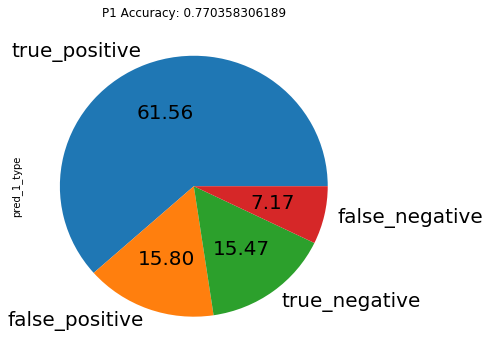

In [18]:
%matplotlib inline

#Plot for predictor_1


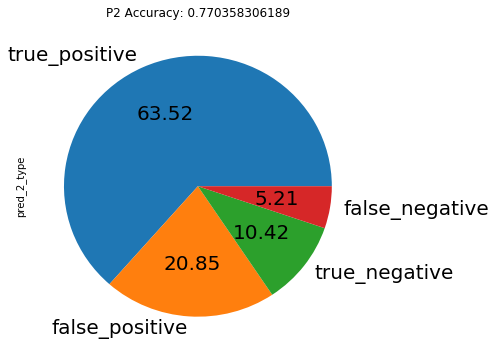

In [19]:
#Next predictor_2




<h2>
The accuracy is the same for each!
</h2>
<p>
<div class=h1_cell>
It appears what we have done is move some of the errors around. In particular, we have shrunk the false negatives a bit and increased the false positives. If that is a good thing or not depends on how you put a value on the different error types.
</div>


<h2>
Compare F1 scores
</h2>
<p>
<div class=h1_cell>
As reminder, here is the table to use.
<p>

<img src='https://www.dropbox.com/s/zubecbzi8zsdzgg/confusion_matrix.png?raw=1'>

<div>

In [20]:
#compute F1 for the first predictor


0.842809364548495

In [21]:
#compute F1 for the second predictor


0.8297872340425533

<div class=just_text>
Not much difference in F1 scores.
</div>


<h2>
Compare informedness scores
</h2>
<p>
<div class=h1_cell>
You won't find this measure in the confusion matrix. We defined it while working with Titanic data.
<div>

In [22]:
#informedness for predictor 1



0.3905262638230649

In [23]:
#informedness for predictor 2



0.25750394944707744

<div class=just_text>
Relatively low for both.
</div>

<hr>
<h1>
6: Write out your table to file
</h1>
<div class=h1_cell>
We will make use of it in future assignments.
</div>

In [24]:
loan_table.head(1)   # see the columns you are writing out

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,no_lam,filled_lam,pa_Rural,pa_Semiurban,pa_Urban,pa_nan,lam_bin,lam_Low,lam_Average,lam_High,ch_bad,ch_good,ch_nan,pred_1,pred_1_type,pred_2,pred_2_type
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,1,146.412162,0,0,1,0,Low,1,0,0,0,1,0,1,true_positive,1,true_positive


In [ ]:
import os

week = 2  # change this each week

home_path =  os.path.expanduser('~')

file_path = '...'

file_name = 'loan_wrangled_w'+str(week)+'.csv'

loan_table.to_csv(home_path + file_path + file_name, index=False)

<hr>
<h1>Next up</h1>
<div class=h1_cell>

    In the next module, we will turn our attention to measuring the effectiveness of nodes in the tree on an individual basis. We chose `ch_good` as the root in the two trees above. Why? Is some other question better? We will look at ways of answering this question.
</div>